In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.layers import BatchNormalization, Activation
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import os
import gc

In [3]:
TRAIN_DIR = "/kaggle/input/face-expression-dataset/Face_Emotion_dataSet/train"
TEST_DIR = "/kaggle/input/face-expression-dataset/Face_Emotion_dataSet/test"

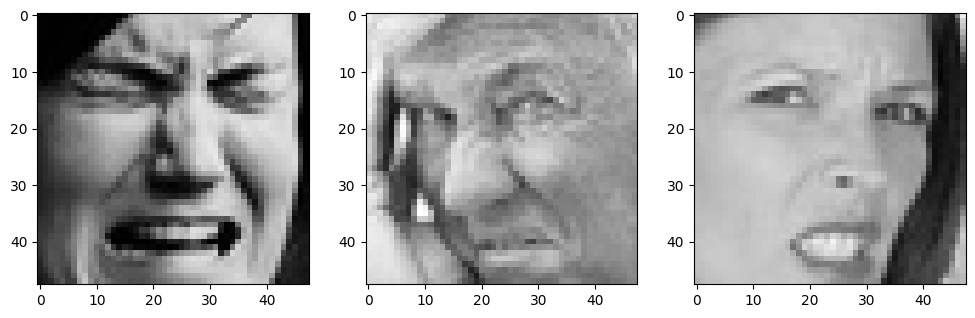

In [4]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 4, 1):
    plt.subplot(3,3,i)
    img = load_img(TRAIN_DIR+'/'+expression+"/"+
                  os.listdir(TRAIN_DIR+ '/'+ expression)[i], target_size=(48,48))
    plt.imshow(img)   
plt.show()

In [55]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [56]:
number_of_images = {}
for class_name in class_names:
    number_of_images[class_name] = len(os.listdir(TRAIN_DIR+"/"+class_name))

images_per_class = pd.DataFrame(list(number_of_images.items()), columns=['Class Name', 'Number of Images'])
images_per_class

,Class Name,Number of Images
0,angry,7988
1,disgust,872
2,fear,8200
3,happy,14379
4,neutral,9947
5,sad,9768
6,surprise,6376


In [57]:
number_of_images = {}
for class_name in class_names:
    number_of_images[class_name] = len(os.listdir(TEST_DIR+"/"+class_name))

images_per_class = pd.DataFrame(list(number_of_images.items()), columns=['Class Name', 'Number of Images'])
images_per_class

,Class Name,Number of Images
0,angry,1918
1,disgust,222
2,fear,2042
3,happy,3599
4,neutral,2449
5,sad,2386
6,surprise,1628


In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [6]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


In [8]:
from tqdm import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode = "grayscale", target_size=(128,128))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),128,128,1)
    return features

In [9]:
train_features = extract_features(train['image'])

100%|██████████| 57530/57530 [05:15<00:00, 182.40it/s]


In [10]:
test_features = extract_features(test['image'])

100%|██████████| 14244/14244 [01:15<00:00, 188.05it/s]


In [11]:
x_train = train_features/255.0
x_test = test_features/255.0

In [12]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [13]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [14]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [15]:
no_of_classes=7

model=Sequential()

#1st CNN layer
model.add(Conv2D(32,(3,3),padding="same",input_shape=(128,128,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(64,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(256,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())


#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,495,751 (17.15 MB)

 Trainable params: 4,492,231 (17.14 MB)

 Non-trainable params: 3,520 (13.75 KB)

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define callbacks
checkpoint = ModelCheckpoint("./model.keras",  # Change file extension to .keras
                              monitor='val_accuracy',  # Update to 'val_accuracy'
                              verbose=1, 
                              save_best_only=True, 
                              mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=5,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.4,
                                        patience=5,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [checkpoint, reduce_learningrate]

In [17]:
history=model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 50, validation_data = (x_test,y_test),callbacks=callbacks_list)

Epoch 1/50


I0000 00:00:1731595313.106788      94 service.cc:145] XLA service 0x79ded4008f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731595313.106872      94 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-11-14 14:42:04.442751: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,32,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,32,64,64]{3,2,1,0}, f32[128,64,64,64]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-11-14 14:42:04.469388: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.026835424s
Trying algorithm eng0{} for conv (

  2/450 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - accuracy: 0.2109 - loss: 2.3858   

I0000 00:00:1731595331.106532      94 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.2910 - loss: 1.8424
Epoch 1: val_accuracy improved from -inf to 0.28258, saving model to ./model.keras
450/450 ━━━━━━━━━━━━━━━━━━━━ 75s 116ms/step - accuracy: 0.2912 - loss: 1.8419 - val_accuracy: 0.2826 - val_loss: 2.0073 - learning_rate: 0.0010
Epoch 2/50
449/450 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5131 - loss: 1.2727
Epoch 2: val_accuracy improved from 0.28258 to 0.55329, saving model to ./model.keras
450/450 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.5132 - loss: 1.2725 - val_accuracy: 0.5533 - val_loss: 1.1742 - learning_rate: 0.0010
Epoch 3/50
449/450 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5867 - loss: 1.0903
Epoch 3: val_accuracy improved from 0.55329 to 0.60657, saving model to ./model.keras
450/450 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.5868 - loss: 1.0902 - val_accuracy: 0.6066 - val_loss: 1.0616 - learning_rate: 0.0010
Epoch 4/50
449/450 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 

In [18]:
from keras.applications import MobileNetV2
from keras.layers import Conv2D, Input, GlobalAveragePooling2D, Dense, Flatten
from keras.models import Model

input_tensor = Input(shape=(128,128,1))
x= Conv2D(3,(3,3), padding = 'same')(input_tensor)

base_model = MobileNetV2(input_shape = (128,128,3),include_top = False, weights = 'imagenet')(x)

y = GlobalAveragePooling2D()(base_model)

output_tensor = Dense(7, activation='softmax')(y)

model1 = Model(inputs=input_tensor, outputs=output_tensor)

model1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model1.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 3)    │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         8,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,266,981 (8.65 MB)

 Trainable params: 2,232,869 (8.52 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [19]:
history1= model1.fit(x= x_train,y = y_train, batch_size = 128, epochs = 50, validation_data = (x_test,y_test), callbacks=callbacks_list) 

Epoch 1/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.5226 - loss: 1.2869
Epoch 1: val_accuracy did not improve from 0.93815
450/450 ━━━━━━━━━━━━━━━━━━━━ 111s 153ms/step - accuracy: 0.5227 - loss: 1.2865 - val_accuracy: 0.2935 - val_loss: 6.3514 - learning_rate: 0.0010
Epoch 2/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6925 - loss: 0.8267
Epoch 2: val_accuracy did not improve from 0.93815
450/450 ━━━━━━━━━━━━━━━━━━━━ 45s 100ms/step - accuracy: 0.6925 - loss: 0.8267 - val_accuracy: 0.3126 - val_loss: 4.0996 - learning_rate: 0.0010
Epoch 3/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7525 - loss: 0.6794
Epoch 3: val_accuracy did not improve from 0.93815
450/450 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - accuracy: 0.7525 - loss: 0.6794 - val_accuracy: 0.3068 - val_loss: 4.3481 - learning_rate: 0.0010
Epoch 4/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7931 - loss: 0.5668
Epoch 4: val_accuracy did not improve from 0.93815
450/450 ━━

In [20]:
from keras.applications import MobileNetV3Large
from keras.layers import Conv2D, Input, GlobalAveragePooling2D, Dense, Flatten
from keras.models import Model

input_tensor = Input(shape=(128,128,1))
x= Conv2D(3,(3,3), padding = 'same')(input_tensor)

base_model = MobileNetV3Large(input_shape = (128,128,3),include_top = False, weights = 'imagenet')(x)

y = GlobalAveragePooling2D()(base_model)

output_tensor = Dense(7, activation='softmax')(y)

model2 = Model(inputs=input_tensor, outputs=output_tensor)

model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model2.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/applications/mobilenet_v3.py:512: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 3)    │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobilenetV3large (Functional)   │ (None, 4, 4, 960)      │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 960)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │         6,727 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,003,109 (11.46 MB)

 Trainable params: 2,978,709 (11.36 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [21]:
history2=model2.fit(x= x_train,y = y_train, batch_size = 64, epochs = 50, validation_data = (x_test,y_test),callbacks=callbacks_list)

Epoch 1/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5434 - loss: 1.2328
Epoch 1: val_accuracy did not improve from 0.93892
899/899 ━━━━━━━━━━━━━━━━━━━━ 123s 87ms/step - accuracy: 0.5434 - loss: 1.2326 - val_accuracy: 0.1675 - val_loss: 2.4079 - learning_rate: 0.0010
Epoch 2/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7262 - loss: 0.7541
Epoch 2: val_accuracy did not improve from 0.93892
899/899 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.7262 - loss: 0.7541 - val_accuracy: 0.1348 - val_loss: 3.5220 - learning_rate: 0.0010
Epoch 3/50
898/899 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7997 - loss: 0.5594
Epoch 3: val_accuracy did not improve from 0.93892
899/899 ━━━━━━━━━━━━━━━━━━━━ 51s 57ms/step - accuracy: 0.7997 - loss: 0.5594 - val_accuracy: 0.2529 - val_loss: 3.0654 - learning_rate: 0.0010
Epoch 4/50
898/899 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8579 - loss: 0.4058
Epoch 4: val_accuracy did not improve from 0.93892
899/899 ━━━━━━━━━━

In [22]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

446/446 - 6s - 13ms/step - accuracy: 0.9378 - loss: 0.3681
Test Loss: 0.3680975139141083
Test Accuracy: 0.9377983808517456


In [23]:
# Evaluate the model on the test set
test_loss, test_accuracy = model1.evaluate(x_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

446/446 - 9s - 19ms/step - accuracy: 0.9379 - loss: 0.6164
Test Loss: 0.6164231300354004
Test Accuracy: 0.937868595123291


In [24]:
# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(x_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

446/446 - 10s - 22ms/step - accuracy: 0.9378 - loss: 0.6434
Test Loss: 0.6433741450309753
Test Accuracy: 0.9377983808517456


In [25]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

In [26]:
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

print("Loss -",loss_label)
print("Accuracy-",acc_label)

Loss - best epoch= 24
Accuracy- best epoch= 44


In [27]:
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
preds_op=[]
for i in range(0,len(test)):
    #print("Original Output:", test['label'][image_index])
    pred = model.predict(x_test[i].reshape(1, 128,128, 1))
    prediction_label = le.inverse_transform([pred.argmax()])[0]
    preds_op.append(prediction_label)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

# Set 'average' to an appropriate multiclass option (e.g., 'weighted', 'micro', 'macro')
precision = precision_score(test.label, preds_op, average='weighted')  # or 'macro', 'micro'
recall = recall_score(test.label, preds_op, average='weighted')
f1 = f1_score(test.label, preds_op, average='weighted')
accuracy = accuracy_score(test.label, preds_op)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.9377983712440325
Precision: 0.9381184470508005
Recall: 0.9377983712440325
F1-Score: 0.9378141669238661


In [36]:
from sklearn.metrics import classification_report
print(classification_report(test.label,preds_op,target_names=labels))

              precision    recall  f1-score   support

       angry       0.93      0.91      0.92      1918
     disgust       0.96      0.91      0.94       222
        fear       0.94      0.90      0.92      2042
       happy       0.97      0.97      0.97      3599
     neutral       0.92      0.94      0.93      2449
         sad       0.89      0.93      0.91      2386
    surprise       0.96      0.96      0.96      1628

    accuracy                           0.94     14244
   macro avg       0.94      0.93      0.94     14244
weighted avg       0.94      0.94      0.94     14244



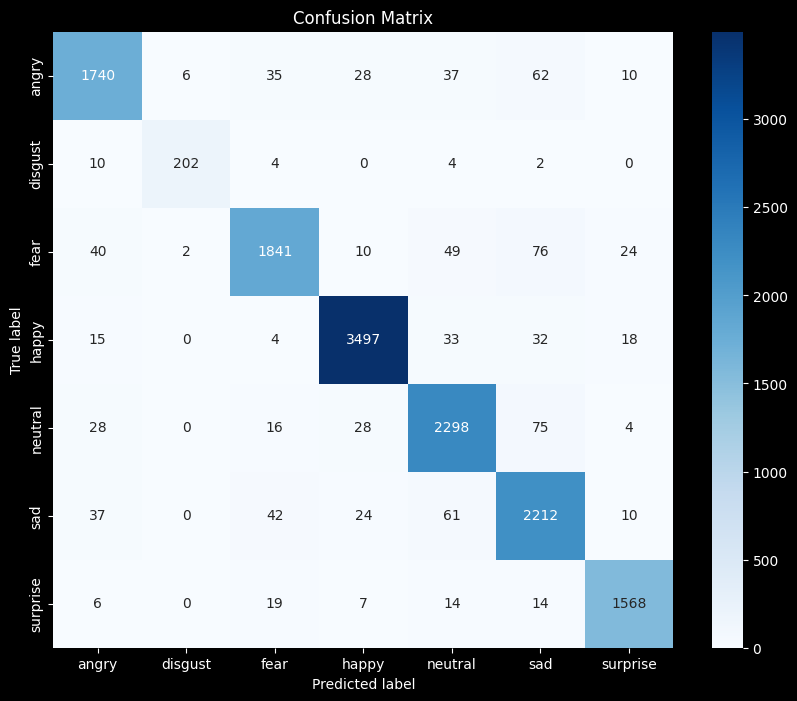

In [37]:
from sklearn.metrics import confusion_matrix, roc_curve
cm = confusion_matrix(test.label, preds_op)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

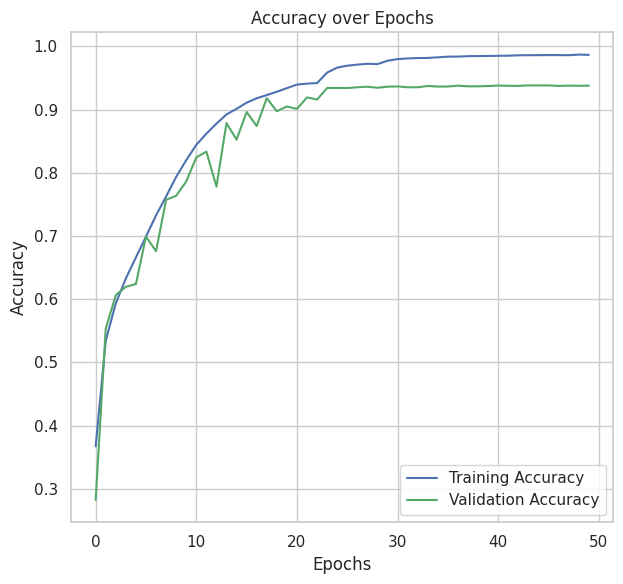

In [48]:
sns.set(style="whitegrid")

# Plotting Accuracy
plt.figure(figsize=(12, 6))  # Figure size
plt.subplot(1, 2, 1)  # Subplot (1 row, 2 columns, first plot)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='g')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()  # Adjust subplots for better layout
plt.show()

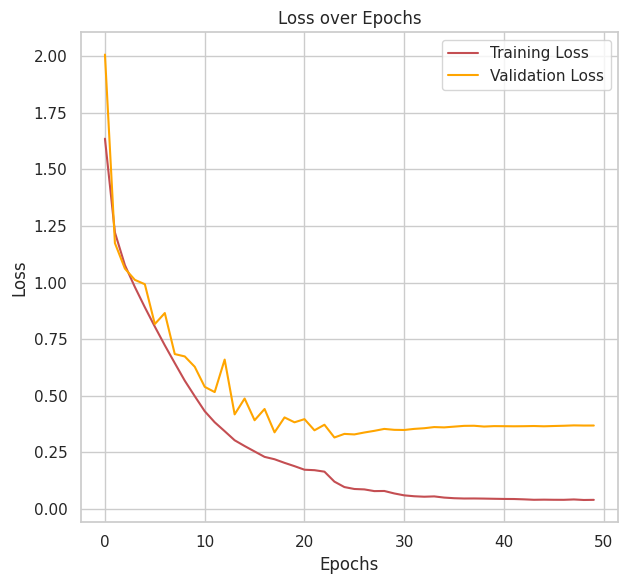

In [49]:
# Plotting Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)  # Subplot (1 row, 2 columns, second plot)
plt.plot(history.history['loss'], label='Training Loss', color='r')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()  # Adjust subplots for better layout
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


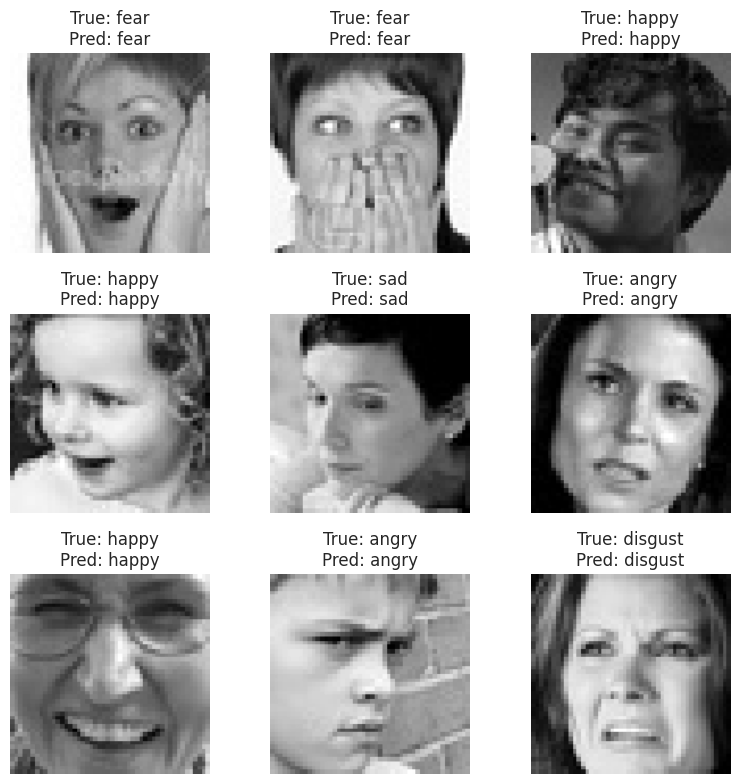

In [53]:
import random

# Define the grid size for the images (3x3 for example)
rows = 3
cols = 3

# Create a figure with a defined size
fig, axes = plt.subplots(rows, cols, figsize=(8,8))

# Loop over the range and randomly sample images
for i in range(rows * cols):
    img_idx = random.randint(0, len(test) - 1)  # Random index within the test set
    true_label = test['label'].iloc[img_idx]  # Get the true label from the DataFrame
    pred = model.predict(x_test[img_idx].reshape(1, 128,128, 1))  # Predict the label
    prediction_label = le.inverse_transform([pred.argmax()])[0]  # Convert to human-readable label
   
    # Get the current subplot (row, col)
    ax = axes[i // cols, i % cols]
    
    # Plot the image
    ax.imshow(x_test[img_idx].reshape(128,128), cmap='gray')
    ax.set_title(f"True: {true_label}\nPred: {prediction_label}")  # Set title with labels
    ax.axis('off')  # Hide axes to focus on the image

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [52]:
model_json = model.to_json()
with open("Face_expression_model.json",'w') as json_file:
    json_file.write(model_json)
model.save("Face_expression_model.h5")